In [3]:
#http://archive.ics.uci.edu/ml/datasets/concrete+slump+test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv("cement_slump.csv")

In [4]:
#Data exploration
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [52]:
df.corr()['Compressive Strength (28-day)(Mpa)']
#the more cement, the better the strength, the more water the less strength

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

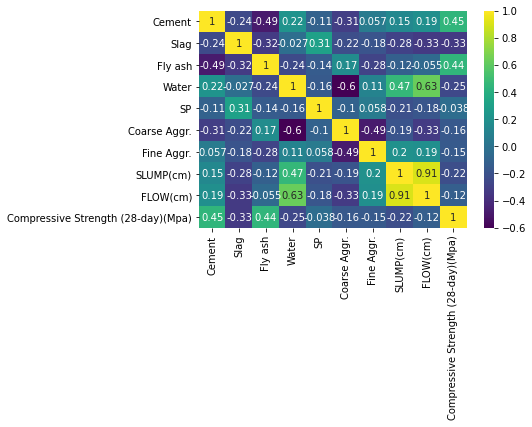

In [10]:
sns.heatmap(df.corr(), cmap = "viridis", annot = True)

In [11]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis=1) #list of features
y = df["Compressive Strength (28-day)(Mpa)"] #label (what we are trying to predict)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.svm import SVR, LinearSVR

In [25]:
#C for regularization, defualt is 1; but if there is noise in the data (variance) 
base_model = SVR()

In [26]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [28]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
89,150.3,111.4,238.8,167.3,6.5,999.5,670.5,14.50,36.5
41,154.0,141.0,181.0,234.0,11.0,797.0,683.0,23.00,65.0
23,146.0,178.0,0.0,192.0,11.0,961.0,749.0,18.00,46.0
26,308.0,111.0,142.0,217.0,10.0,783.0,686.0,25.00,70.0
22,148.0,180.0,0.0,183.0,11.0,972.0,757.0,0.00,20.0
...,...,...,...,...,...,...,...,...,...
63,291.0,104.0,0.0,231.0,9.0,857.0,725.0,23.00,69.0
70,276.0,90.0,116.0,180.0,9.0,870.0,768.0,0.00,20.0
81,140.1,11.8,226.1,207.8,4.9,1020.9,683.8,21.00,64.0
11,148.0,109.0,139.0,193.0,7.0,768.0,902.0,23.75,58.0


In [29]:
scaled_X_train
#each set of values between [] is equal to a row

array([[-0.97616308,  0.48761757,  1.0288507 , -1.52996498, -0.8426741 ,
         1.36869431, -1.00173811, -0.41697052, -0.75855243],
       [-0.92521387,  0.99821087,  0.31639166,  1.94157002,  1.10751454,
        -0.95666815, -0.82225804,  0.55516647,  0.87270893],
       [-1.03537432,  1.63645251, -1.91466518, -0.24440404,  1.10751454,
         0.92658836,  0.12539674, -0.01667882, -0.21479865],
       [ 1.19537472,  0.48071766, -0.16433329,  1.05677099,  0.67413928,
        -1.11743395, -0.77918282,  0.78390458,  1.15889513],
       [-1.00783421,  1.67095206, -1.91466518, -0.71282706,  1.10751454,
         1.05290435,  0.24026399, -2.07532186, -1.70296691],
       [-0.66633682,  1.29663196,  1.03747909, -1.57680728, -0.45263638,
         0.83012888, -1.38080002, -2.07532186, -1.70296691],
       [ 1.01636399,  0.39446879, -0.23829098,  0.58834798, -1.05936173,
        -0.10690607, -1.29608543,  0.95545817,  1.15889513],
       [ 1.15406455,  0.29097014, -1.91466518, -0.03621604,  0

In [30]:
base_preds = base_model.predict(scaled_X_test)

In [31]:
y_test

37    18.26
1     41.14
69    31.90
80    26.42
92    44.48
61    39.93
85    30.97
53    38.59
88    37.92
32    52.65
6     38.86
71    28.16
43    27.62
16    28.29
50    45.69
31    43.95
97    44.08
14    32.44
25    33.38
51    32.04
21    36.19
3     42.08
84    33.78
57    29.63
48    58.53
47    43.01
79    30.43
58    26.42
2     41.81
13    33.91
45    31.77
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [32]:
base_preds

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [36]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [38]:
y_test.mean()

36.26870967741935

In [39]:
#Grid search why do we need it? in an attempt for a better model

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 'kernel':['linear', 'rbf', 'poly'],
            'gamma':['scale', 'auto'],
             'degree':[2,3,4],
             'epsilon':[0,0.01,0.1,0.5,1,2]}

In [44]:
svr = SVR()
grid = GridSearchCV(svr, param_grid = param_grid)

In [45]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [46]:
grid.best_params_
#why degree 2 and linear kernel?

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [47]:
grid_preds = grid.predict(scaled_X_test)

In [49]:
#Went down to 2.5 from ~5
mean_absolute_error(y_test, grid_preds)

2.5128012210762365

In [50]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119858

In [51]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`sklearn.svm.LinearSVR` or
 |  :class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies the k